In [19]:
import snscrape
import snscrape.modules.twitter as sn
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import sklearn.linear_model as skl
from matplotlib import ticker

In [20]:
Dati = pd.read_csv('/home/francesco/Codici/Computazionale/Dc1/Punto B2/Totali_Riscaldamento_Globale.csv')

Anno
2017      31
2018     256
2019     898
2020     567
2021     982
2022    1239
Name: Data, dtype: int64


<BarContainer object of 6 artists>

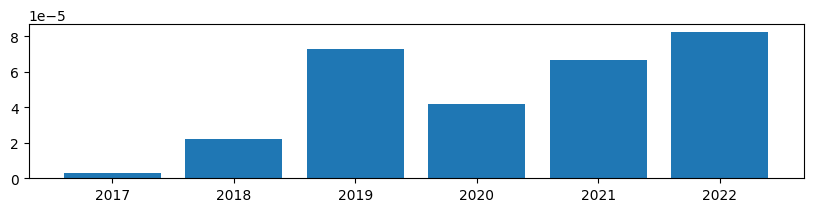

In [21]:
Dati['Data'] = pd.to_datetime(Dati['Data'])
Dati['Anno'] = Dati.Data.dt.year
bar = Dati.groupby(['Anno']).Data.count()
reg = skl.LinearRegression()
anni = np.array(bar.index).reshape((-1 , 1))
lin = reg.fit(anni , bar.array)
utenti_ita = [10.5 , 11.7 , 12.3 , 13.5 , 14.8 , 15] 
print(bar)
plt.bar(bar.index , bar/utenti_ita/10**6)

<BarContainer object of 6 artists>

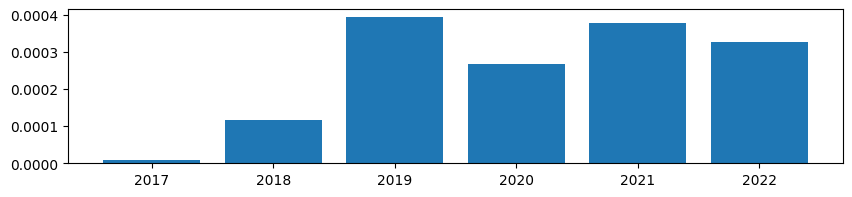

In [22]:
Dati_Crucchi = pd.read_csv('/home/francesco/Codici/Computazionale/Dc1/Punto B2/Totali_Riscaldamento_Globale_Crucco.csv')
Dati_Crucchi['Data'] = pd.to_datetime(Dati_Crucchi['Data'])
Dati_Crucchi['Anno'] = Dati_Crucchi.Data.dt.year
bar_crucco = Dati_Crucchi.groupby(['Anno']).Data.count()
lin = reg.fit(anni , bar_crucco.array)

utenti_germania = [12.6 , 12.9 , 12.5  , 12.7 ,13.5 ,13.5]
plt.bar(bar_crucco.index , bar_crucco/utenti_germania/10**6)

<BarContainer object of 6 artists>

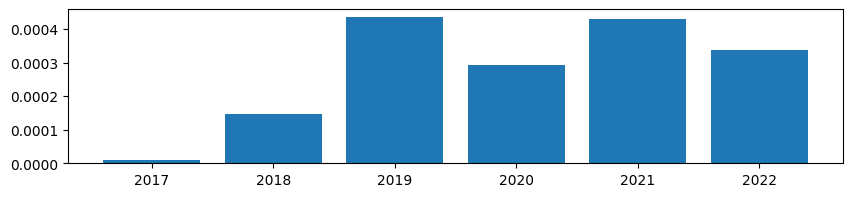

In [23]:
Dati_Fra = pd.read_csv('/home/francesco/Codici/Computazionale/Dc1/Punto B2/Totali_Riscaldamento_Globale_Crucco.csv')
Dati_Fra['Data'] = pd.to_datetime(Dati_Fra['Data'])
Dati_Fra['Anno'] = Dati_Fra.Data.dt.year
bar_Fra = Dati_Fra.groupby(['Anno']).Data.count()
lin = reg.fit(anni , bar_Fra.array)

utenti_bar_Fra = [9.2 , 10.2  , 11.3 , 11.6 , 11.8 , 13.1] 
plt.bar(bar_Fra.index , bar_Fra/utenti_bar_Fra/10**6)

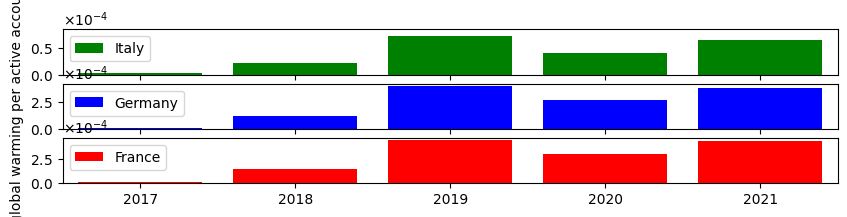

In [24]:
fig , axs = plt.subplots(3  , sharex=True)
plt.rcParams['figure.figsize'] = [10,2]
plt.rc('font', **{'size':'10'})
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 
axs[0].bar(bar.index , bar/utenti_ita/10**6 , label = 'Italy' , color = 'green')
axs[1].bar(bar_crucco.index , bar_crucco/utenti_germania/10**6 , label = 'Germany' , color = 'blue')
axs[2].bar(bar_Fra.index , bar_Fra/utenti_bar_Fra/10**6 ,label = 'France' ,  color = 'red')
axs[1].set_ylabel('Tweet on global warming per active account in state' )
axs[1].yaxis.set_label_coords( x = -0.05 , y = 0.5)
for i in axs : 
    i.legend(loc = 'upper left')
    i.set_xlim(2016.5 , 2021.5)
    i.yaxis.set_major_formatter(formatter)

In [25]:
def somma(a , b) : 
    c = []
    for i in range(len(a)) : 
        c.append(a[i] + b[i])

    c[0] = c[2]/c[1]
    return c

In [26]:
Germania = pd.read_csv('/home/francesco/Codici/Computazionale/Dc1/Tweet2.0/Germania.csv' , dtype={'Tweet_p' : float})
Italia = pd.read_csv('/home/francesco/Codici/Computazionale/Dc1/Tweet2.0/Italia.csv')
Francia = pd.read_csv('/home/francesco/Codici/Computazionale/Dc1/Tweet2.0/Francia.csv')


In [27]:
Italia22 = Italia.loc[Italia.Year == 2022]
Italia18 = Italia.loc[Italia.Year == 2018]
Italia18.reset_index(inplace=True)

Germania21 = Germania.loc[Germania.Year == 2021]
Germania17 = Germania.loc[Germania.Year == 2017]
Germania17.reset_index(inplace=True)

Francia22 = Francia.loc[Francia.Year == 2022]
Francia17 = Francia.loc[Francia.Year == 2017]
Francia17.reset_index(inplace=True)
Italia22
print(type(Francia17.Tweet_p[0]))

<class 'numpy.float64'>


In [28]:
def format(Dati) : 
    for i in range(len(Dati.Tweet)) :
        Dati.Tweet_p[i] = '{:1.3f}'.format(Dati.Tweet_p[i])
    

In [29]:
#format(Italia18)
#format(Italia22)
#format(Germania17)
#format(Germania21)
#format(Francia17)
#format(Francia22)
#for i in Italia22.Tweet_p  :
#    print(i)

In [35]:
def bar_plot(Dati , dove , titolo) : 
    ax = Dati.plot.bar( x = 'Partiti' , y = ['Tweet_p'] ,  color= Dati['New_Color'].array , legend = False ,
        ylabel = 'Tweet on global warming (%)' , ax = dove ,  title = titolo , xlabel = '')
    #dove.set_ylim(0,35)
    #counter = 0
    #for patch in ax.patches :
    #    bl = patch.get_xy()
    #    x = 0.5 * patch.get_width() + bl[0] 
    #    y = patch.get_height() + bl[1] + 0.2
    #    ax.text(x,y,((Dati.Partiti[counter])), ha = 'center', rotation = 'horizontal')
    #    counter = counter +1

In [31]:
#Nuovi Colori
Italia18['New_Color'] = ['lawngreen' , 'limegreen' , 'green' , 'darkgreen' , 'greenyellow']
Italia22['New_Color'] = ['green' , 'lawngreen' , 'lime' , 'limegreen' , 'springgreen' , 'darkgreen' , 'greenyellow']

Germania17['New_Color'] = ['navy' , 'lightblue' , 'aqua' , 'royalblue' , 'slateblue' , 'blue']
Germania21['New_Color'] = ['lightblue' , 'navy' , 'aqua' , 'royalblue'  , 'blue']

Francia17['New_Color'] = ['coral' , 'darkred' , 'lightcoral', 'red']
Francia22['New_Color'] = ['darkred' , 'coral' , 'lightcoral', 'red']

/tmp/ipykernel_3904/1742299071.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Italia18['New_Color'] = ['lawngreen' , 'limegreen' , 'green' , 'darkgreen' , 'greenyellow']
/tmp/ipykernel_3904/1742299071.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Italia22['New_Color'] = ['green' , 'lawngreen' , 'lime' , 'limegreen' , 'springgreen' , 'darkgreen' , 'greenyellow']
/tmp/ipykernel_3904/1742299071.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

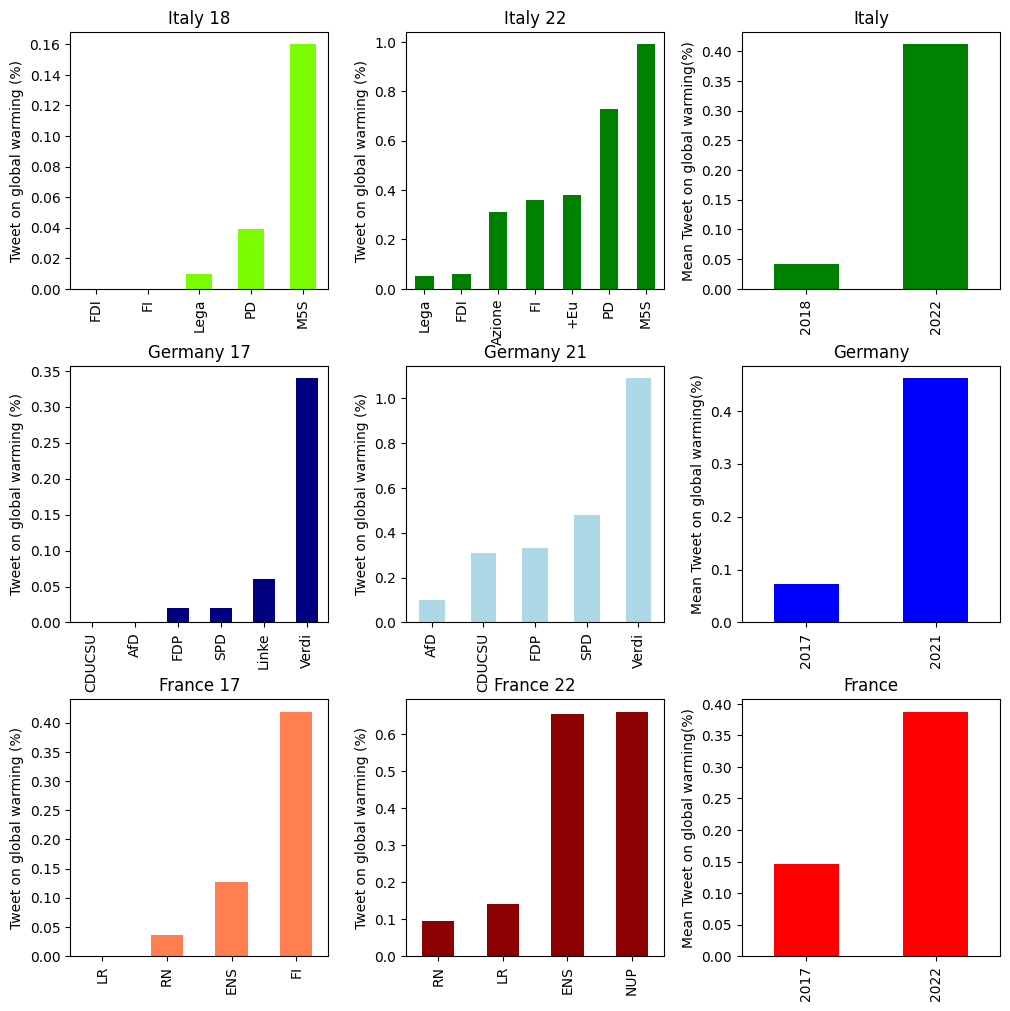

In [36]:
#Grafico
plt.rcParams['figure.figsize'] = [12, 12]
fig , axs = plt.subplots(3 , 3 )
#Italia
bar_plot(Italia22 , axs[0,1] , 'Italy 22')
bar_plot(Italia18 , axs[0,0] , 'Italy 18')
Italia.groupby('Year').Tweet_p.mean().plot.bar(ax = axs[0,2] ,xlabel = '', title = 'Italy' ,  color= 'green')
axs[0,2].set_ylabel('Mean Tweet on global warming(%)')

#Germania
bar_plot(Germania21 , axs[1,1] , 'Germany 21')
bar_plot(Germania17 , axs[1,0] , 'Germany 17')
Germania.groupby('Year').Tweet_p.mean().plot.bar(ax = axs[1,2] , xlabel = '' , color = 'blue' , title = 'Germany')
axs[1,2].set_ylabel('Mean Tweet on global warming(%)')

#Francia
bar_plot(Francia22 , axs[2,1] , 'France 22')
bar_plot(Francia17 , axs[2,0] , 'France 17')
Francia.groupby('Year').Tweet_p.mean().plot.bar(ax = axs[2,2] ,xlabel = '', title = 'France' ,  color = 'red')
axs[2,2].set_ylabel('Mean Tweet on global warming(%)')

fig.subplots_adjust(hspace=0.3 , wspace=0.3)

In [33]:
def scatter(Dati , dove , titolo) : 
    dove.set_xscale('linear')
    dove.scatter(x = Dati['Tweet_p'] , y = Dati['Risultati']  , s = 100, color = Dati['Colori'].array)
    dove.set_ylabel('Results (%)')
    dove.set_title (titolo)

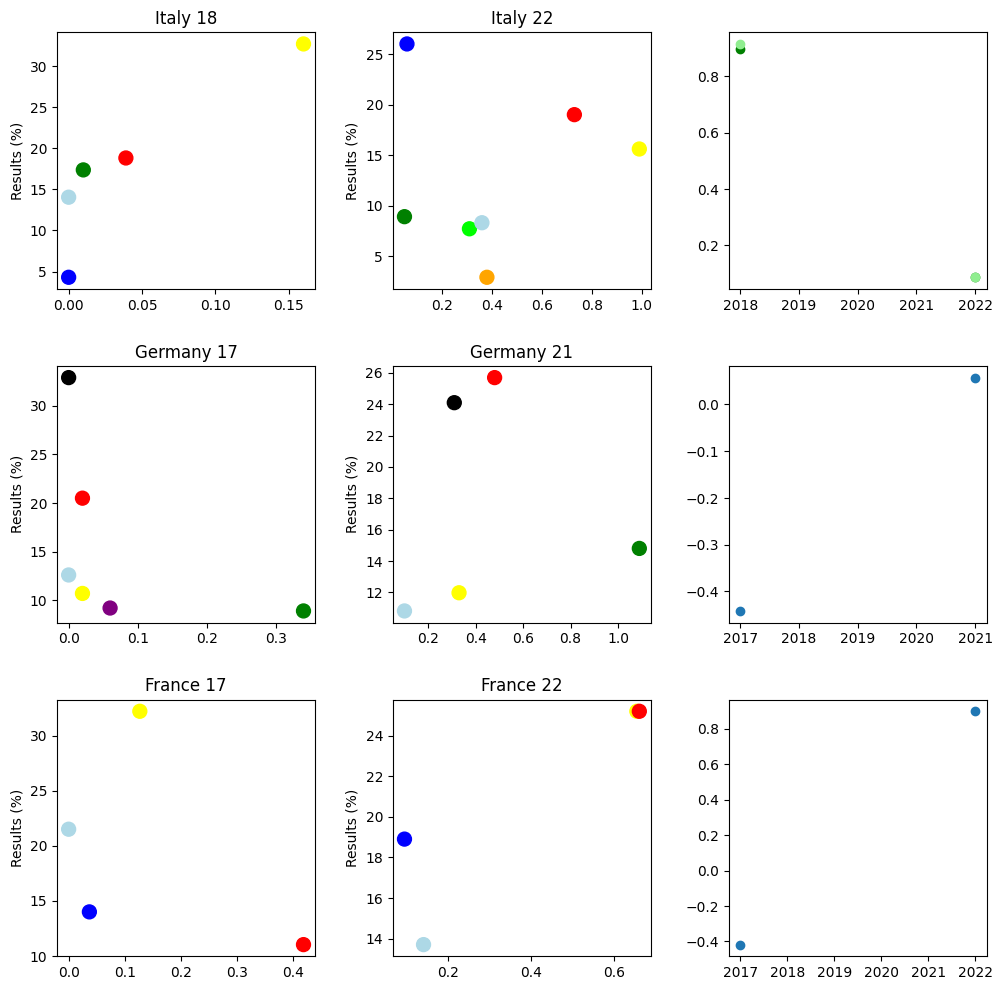

In [57]:
plt.rcParams['figure.figsize'] = [12, 12]
fig , axs = plt.subplots(3 , 3)
#Italia
scatter(Italia22 , axs[0,1] , 'Italy 22')
scatter(Italia18 , axs[0,0] , 'Italy 18')
axs[0,2].scatter([2018 , 2022] , [ Italia18.Tweet_p.corr(Italia18['Risultati']), Italia22.Tweet_p.corr(Italia22['Risultati'])] , color = 'green')
axs[0,2].scatter([2018 , 2022] , [ Italia18.Tweet_p.corr(Italia18['Risultati_U35']), Italia22.Tweet_p.corr(Italia22['Risultati'])] , color = 'lightgreen')

#Germania
scatter(Germania21 , axs[1,1] , 'Germany 21')
scatter(Germania17 , axs[1,0] , 'Germany 17')
axs[1,2].scatter([2017 , 2021] , [Germania17.Tweet_p.corr(Germania17['Risultati']) , Germania21.Tweet_p.corr(Germania21['Risultati'])])

#Francia
scatter(Francia22 , axs[2,1] , 'France 22')
scatter(Francia17 , axs[2,0] , 'France 17')
axs[2,2].scatter([2017 , 2022] , [Francia17.Tweet_p.corr(Francia17['Risultati']) , Francia22.Tweet_p.corr(Francia22['Risultati'])])


fig.subplots_adjust(hspace=0.3 , wspace=0.3)